# Aula6: Pandas & Matplotlib

Como já vimos, o módulo Pandas é excelente para construção e manipulação de dados. 

Vamos extender nosso conhecimento aplicando Pandas para visualição de dados utilizando o pacote [Matplotlib](https://matplotlib.org)

In [1]:
import pandas as pd
import pickle
import os

In [2]:
os.chdir("/Users/gustavorsampaio/Documents/Cursos/Python 2021.2/Aulas/")

In [3]:
df = pd.read_csv("filmes.csv", header=None)
df

,0,1,2
0,Dunkirk (2017) - IMDb,543.268,7.9
1,Piratas do Caribe: A Vinganca de Salazar (2017...,259.112,6.6
2,Soul Surfer: Coragem de Viver (2011) - IMDb,45.257,7.0
3,Top Gun: Ases Indomaveis (1986) - IMDb,291.570,6.9
4,A Lista de Schindler (1993) - IMDb,1.198.580,8.9
5,Dunkirk (2017) - IMDb,543.268,7.9
6,Piratas do Caribe: A Vinganca de Salazar (2017...,259.112,6.6
7,Soul Surfer: Coragem de Viver (2011) - IMDb,45.257,7.0
8,Top Gun: Ases Indomaveis (1986) - IMDb,291.570,6.9
9,A Lista de Schindler (1993) - IMDb,1.198.580,8.9


In [4]:
df.columns = ['filme', 'obs', 'rate']

In [5]:
df

,filme,obs,rate
0,Dunkirk (2017) - IMDb,543.268,7.9
1,Piratas do Caribe: A Vinganca de Salazar (2017...,259.112,6.6
2,Soul Surfer: Coragem de Viver (2011) - IMDb,45.257,7.0
3,Top Gun: Ases Indomaveis (1986) - IMDb,291.570,6.9
4,A Lista de Schindler (1993) - IMDb,1.198.580,8.9
5,Dunkirk (2017) - IMDb,543.268,7.9
6,Piratas do Caribe: A Vinganca de Salazar (2017...,259.112,6.6
7,Soul Surfer: Coragem de Viver (2011) - IMDb,45.257,7.0
8,Top Gun: Ases Indomaveis (1986) - IMDb,291.570,6.9
9,A Lista de Schindler (1993) - IMDb,1.198.580,8.9


In [6]:
df["rate"]

0     7.9
1     6.6
2     7.0
3     6.9
4     8.9
5     7.9
6     6.6
7     7.0
8     6.9
9     8.9
10    8.9
Name: rate, dtype: float64

In [7]:
df["rate"] = pd.to_numeric(df["rate"])

In [8]:
df["rate"].tolist()

[7.9, 6.6, 7.0, 6.9, 8.9, 7.9, 6.6, 7.0, 6.9, 8.9, 8.9]

In [9]:
df['obs']

0       543.268
1       259.112
2        45.257
3       291.570
4     1.198.580
5       543.268
6       259.112
7        45.257
8       291.570
9     1.198.580
10    1.198.580
Name: obs, dtype: object

In [10]:
df['obs'] = df['obs'].apply(lambda x: x.replace(".",""))

In [11]:
df['obs']

0      543268
1      259112
2       45257
3      291570
4     1198580
5      543268
6      259112
7       45257
8      291570
9     1198580
10    1198580
Name: obs, dtype: object

In [18]:
df["obs"] = pd.to_numeric(df["obs"])

In [19]:
df["obs"]

0      543268
1      259112
2       45257
3      291570
4     1198580
5      543268
6      259112
7       45257
8      291570
9     1198580
10    1198580
Name: obs, dtype: int64

Iremos utilizar agora o Matplotlib para construir plots diversos utilizando nossa base de dados

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook

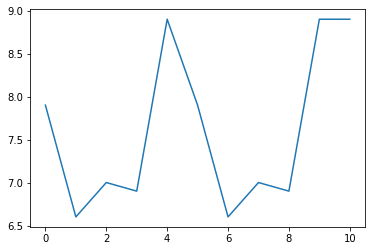

In [13]:
plt.plot(df["rate"])
plt.show()

In [20]:
print(df.describe())

                obs       rate
count  1.100000e+01  11.000000
mean   5.340140e+05   7.590909
std    4.551464e+05   0.945996
min    4.525700e+04   6.600000
25%    2.591120e+05   6.900000
50%    2.915700e+05   7.000000
75%    8.709240e+05   8.400000
max    1.198580e+06   8.900000


Vamos construir um Box Plot para visualizar os mesmos dados

In [15]:
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    a MATLAB-like way of plotting.
    
    pyplot is mainly intended for interactive plots and simple cases of
    programmatic plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The object-oriented API is recommended for more complex plots.

FUNCTIONS
    acorr(x, *, data=None, **kwargs)
        Plot the autocorrelation of *x*.
        
        Parameters
        ----------
        x : array-like
        
        detrend : callable, default: `.mlab.detrend_none` (no detrending)
            A detrending function applied to *x*.  It must have the
            signature ::
        
                detrend(x: np.ndarray) -> np.ndarray
        
        normed : bool, default: True
            If `

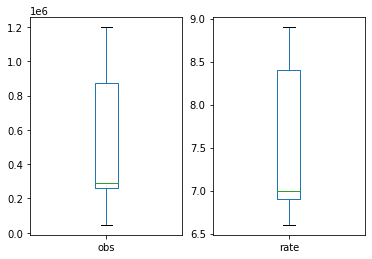

In [21]:
df.plot(kind='box', subplots=True, layout=(1,2), sharex=False, sharey=False)
plt.show()

E o histograma

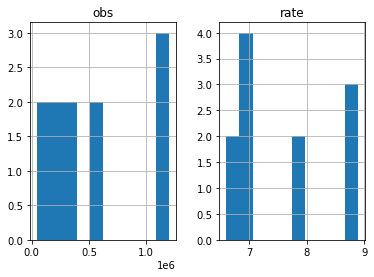

In [22]:
df.hist()
#plt.savefig('foo.png')
plt.show()

O próprio pandas possui um sub-módulo para plots

In [23]:
from pandas.plotting import scatter_matrix

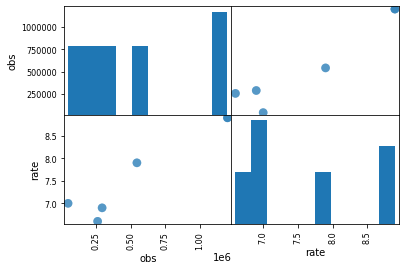

In [24]:
scatter_matrix(df, s=300)
plt.show()

Uma outra opção é plotar a densidade da variável

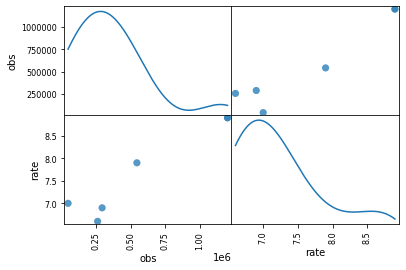

In [25]:
scatter_matrix(df, diagonal='kde', s=200)
plt.show()

### Distribuições

Vamos construir algumas distribuições e seus plots

Iremos utilizar um outro módulo, o SciPy (Scientific Python) e importar sua parte de estatística

In [26]:
from scipy.stats import norm

In [27]:
mu = 0
sigma = 5
rng = range(-30,30)

Podemos gerar uma amostra aleatória de uma distribuição Normal com os parâmetros definidos

In [28]:
dist = norm(mu, sigma)

In [29]:
dist

In [30]:
dist.pdf(rng)

array([1.21517657e-09, 3.95463928e-09, 1.23652410e-08, 3.71472369e-08,
       1.07220707e-07, 2.97343903e-07, 7.92259818e-07, 2.02817041e-06,
       4.98849426e-06, 1.17886136e-05, 2.67660452e-05, 5.83893852e-05,
       1.22380386e-04, 2.46443834e-04, 4.76817640e-04, 8.86369682e-04,
       1.58309032e-03, 2.71659385e-03, 4.47890606e-03, 7.09491857e-03,
       1.07981933e-02, 1.57900317e-02, 2.21841669e-02, 2.99454931e-02,
       3.88372110e-02, 4.83941449e-02, 5.79383106e-02, 6.66449206e-02,
       7.36540281e-02, 7.82085388e-02, 7.97884561e-02, 7.82085388e-02,
       7.36540281e-02, 6.66449206e-02, 5.79383106e-02, 4.83941449e-02,
       3.88372110e-02, 2.99454931e-02, 2.21841669e-02, 1.57900317e-02,
       1.07981933e-02, 7.09491857e-03, 4.47890606e-03, 2.71659385e-03,
       1.58309032e-03, 8.86369682e-04, 4.76817640e-04, 2.46443834e-04,
       1.22380386e-04, 5.83893852e-05, 2.67660452e-05, 1.17886136e-05,
       4.98849426e-06, 2.02817041e-06, 7.92259818e-07, 2.97343903e-07,
      

Combinamos a distribuição com o Matplotlib para construir o plot de sua PDF, CDF e Histograma

Observe que colocaremos cada plot dentro de uma mesma figura selecionando a sua posição 

Text(0.5, 1.0, 'PDF normal')

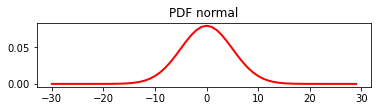

In [42]:
plt.subplot(311) # Criar plot com 3 linhas e 1 coluna, e colocar o plot na primeira posição
plt.plot(rng, dist.pdf(rng), 'r', linewidth=2)
plt.title('PDF normal')

Junto com sua CDF

Text(0.5, 1.0, 'CDF normal')

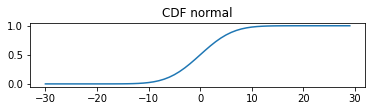

In [32]:
plt.subplot(312)
plt.plot(rng, dist.cdf(rng))
plt.title('CDF normal')

e seu Histograma.

Para o Histograma, iniciaremos com a seleção de uma amostra de tamanho 10,000 da distribuição

In [33]:
sample = dist.rvs(size=10000)

In [34]:
sample

array([-0.51221007, -2.50678485, -0.86097464, ...,  5.79762306,
       -8.32544962,  1.71215004])

In [35]:
df = pd.DataFrame(sample)

In [36]:
df

,0
0,-0.512210
1,-2.506785
2,-0.860975
3,3.791440
4,9.143146
...,...
9995,2.663662
9996,-2.806554
9997,5.797623
9998,-8.325450


In [37]:
print(df.describe())

                  0
count  10000.000000
mean      -0.046480
std        5.032170
min      -19.480981
25%       -3.403145
50%       -0.097135
75%        3.372019
max       19.254787


Text(0.5, 1.0, '10,000 random samples from normal distribution')

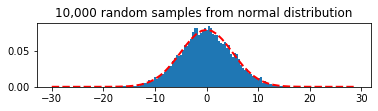

In [40]:
plt.subplot(313)
plt.plot(rng, dist.pdf(rng), 'r--', linewidth=2)
plt.hist(sample, bins=100, density=True)
plt.title('10,000 random samples from normal distribution')

ATENÇÃO: Não (ou faz) faz parte da aula

In [43]:
import random

In [44]:
random.seed( 8327657 )

In [45]:
random.randint(25,50)

25

ATENÇÃO: Fim do exemplo

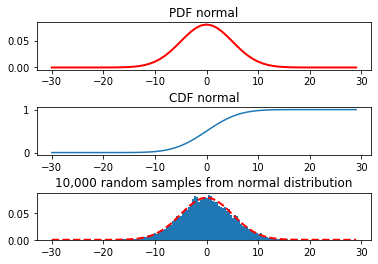

In [46]:
plt.subplot(311)
plt.plot(rng, dist.pdf(rng), 'r', linewidth=2)
plt.title('PDF normal')

plt.subplot(312)
plt.plot(rng, dist.cdf(rng))
plt.title('CDF normal')

plt.subplot(313)
plt.hist(sample, bins=100, density=True)
plt.plot(rng, dist.pdf(rng), 'r--', linewidth=2)
plt.title('10,000 random samples from normal distribution')

plt.subplots_adjust(hspace = 0.8)
plt.show()

Uma outra maneira é criar uma figura e ir adicionando objetos dentro dela

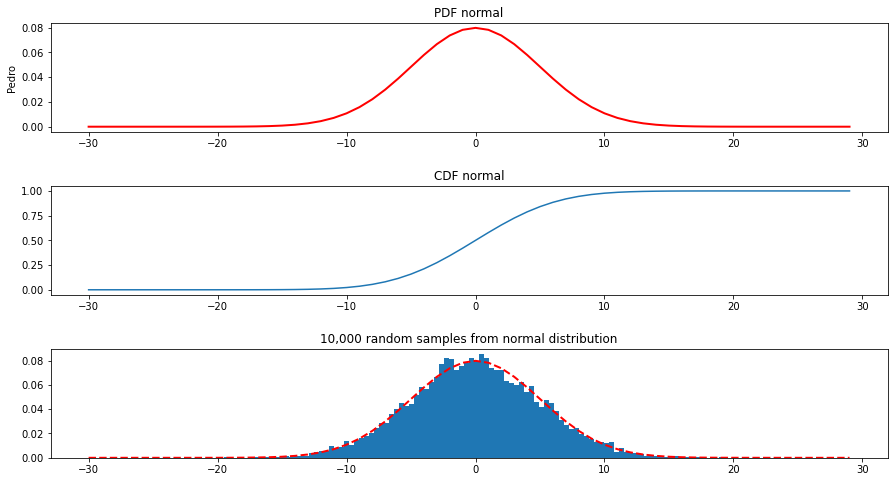

In [47]:
fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(311)
ax.plot(rng, dist.pdf(rng), 'r', linewidth=2)
ax.set_title('PDF normal')
ax.set_ylabel('Pedro')

ax = fig.add_subplot(312)
ax.plot(rng, dist.cdf(rng))
ax.set_title('CDF normal')

ax = fig.add_subplot(313)
ax.hist(sample, bins=100, density=True)
ax.plot(rng, dist.pdf(rng), 'r--', linewidth=2)
ax.set_title('10,000 random samples from normal distribution')

plt.subplots_adjust(hspace = 0.5)

plt.savefig('pedro.jpg')
plt.show()

In [48]:
import numpy as np

### Estatisticas da amostra

In [49]:
mean = np.mean(sample)
median = np.median(sample)
variance = np.var(sample)
sigma = np.sqrt(variance)

d = pd.DataFrame(sample)

skewness = d[0].skew() 
kurtosis = d[0].kurt() 

In [50]:
print('Média:', mean)
print('Mediana:', median)
print('Variância:', variance)
print('Desvio-Padrão:', sigma)

Média: -0.046480381447162517
Mediana: -0.09713516853177512
Variância: 25.32019791598129
Desvio-Padrão: 5.031917916260289


In [51]:
print('Grau de Inclinação:', skewness)
print('Grau de Curtose:', kurtosis)

Grau de Inclinação: 0.022876244774432144
Grau de Curtose: 0.013132576478984248


# Dados Futebol

In [52]:
import os
os.chdir("/Users/gustavorsampaio/Documents/Cursos/Python 2021.2/Aulas/aula6/")

In [53]:
countries = pd.read_pickle("countries.pkl")
leagues = pd.read_pickle("leagues.pkl")
matches = pd.read_pickle("matches.pkl")
teams = pd.read_pickle("teams.pkl")
player = pd.read_pickle("player.pkl")
player_attributes = pd.read_pickle("player_attributes.pkl")
sequence = pd.read_pickle("sequence.pkl")
team_attributes = pd.read_pickle("team_attributes.pkl")
lat_long = pd.read_pickle("lat_long.pkl")

In [54]:
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [55]:
leagues

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [56]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [57]:
list(matches)

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player

In [58]:
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [59]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [60]:
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [70]:
sequence.head()

,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075


In [71]:
team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [61]:
lat_long

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia
244,ZW,-19.015438,29.154857,Zimbabwe
245,e,51.752000,1.257700,England


Vamos utilizar o identificador único (``id``) para juntar as bases de dados. Utilizaremos o ``merge``.

In [62]:
countries_leagues = countries.merge(leagues,left_on="id",right_on="id",how="outer", indicator=True)

In [63]:
leagues

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [65]:
countries_leagues

,id,name_x,country_id,name_y,_merge
0,1,Belgium,1,Belgium Jupiler League,both
1,1729,England,1729,England Premier League,both
2,4769,France,4769,France Ligue 1,both
3,7809,Germany,7809,Germany 1. Bundesliga,both
4,10257,Italy,10257,Italy Serie A,both
5,13274,Netherlands,13274,Netherlands Eredivisie,both
6,15722,Poland,15722,Poland Ekstraklasa,both
7,17642,Portugal,17642,Portugal Liga ZON Sagres,both
8,19694,Scotland,19694,Scotland Premier League,both
9,21518,Spain,21518,Spain LIGA BBVA,both


Agora que fizemos o merge, podemos dropar a variável ``id``

In [66]:
countries_leagues = countries_leagues.drop("id",axis = 1)

In [67]:
countries_leagues

,name_x,country_id,name_y,_merge
0,Belgium,1,Belgium Jupiler League,both
1,England,1729,England Premier League,both
2,France,4769,France Ligue 1,both
3,Germany,7809,Germany 1. Bundesliga,both
4,Italy,10257,Italy Serie A,both
5,Netherlands,13274,Netherlands Eredivisie,both
6,Poland,15722,Poland Ekstraklasa,both
7,Portugal,17642,Portugal Liga ZON Sagres,both
8,Scotland,19694,Scotland Premier League,both
9,Spain,21518,Spain LIGA BBVA,both


E utilizar o comando ``rename`` para renomear as colunas

In [68]:
countries_leagues = countries_leagues.rename(columns={'name_x':"country", 'name_y':"league"})

In [69]:
countries_leagues

,country,country_id,league,_merge
0,Belgium,1,Belgium Jupiler League,both
1,England,1729,England Premier League,both
2,France,4769,France Ligue 1,both
3,Germany,7809,Germany 1. Bundesliga,both
4,Italy,10257,Italy Serie A,both
5,Netherlands,13274,Netherlands Eredivisie,both
6,Poland,15722,Poland Ekstraklasa,both
7,Portugal,17642,Portugal Liga ZON Sagres,both
8,Scotland,19694,Scotland Premier League,both
9,Spain,21518,Spain LIGA BBVA,both


In [94]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


Iremos selecionar apenas algumas colunas

In [70]:
matches_new = matches[['id', 'country_id', 'league_id', 'season', 'stage', 'date',
                       'match_api_id', 'home_team_api_id', 'away_team_api_id',
                       'home_team_goal', 'away_team_goal']]

In [71]:
matches_new

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0


In [72]:
matches_new = matches_new.drop("id",axis=1)

In [73]:
data = matches_new.merge(countries_leagues,left_on="country_id",right_on="country_id",how="outer")

In [74]:
data

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,_merge
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,both
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,both
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium,Belgium Jupiler League,both
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium,Belgium Jupiler League,both
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium,Belgium Jupiler League,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0,Switzerland,Switzerland Super League,both
25975,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2,Switzerland,Switzerland Super League,both
25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0,Switzerland,Switzerland Super League,both
25977,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0,Switzerland,Switzerland Super League,both


Podemos verificar missing values na base com o comando ``isnull()``

In [75]:
data.isnull().sum()

country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
country             0
league              0
_merge              0
dtype: int64

E contar valores únicos em nossa base

In [76]:
data['country'].value_counts()

Spain          3040
England        3040
France         3040
Italy          3017
Germany        2448
Netherlands    2448
Portugal       2052
Poland         1920
Scotland       1824
Belgium        1728
Switzerland    1422
Name: country, dtype: int64

In [77]:
data.nunique()

country_id             11
league_id              11
season                  8
stage                  38
date                 1694
match_api_id        25979
home_team_api_id      299
away_team_api_id      299
home_team_goal         11
away_team_goal         10
country                11
league                 11
_merge                  1
dtype: int64

### Países Europeus jogando futebol

In [78]:
country_info  = countries_leagues.merge(lat_long,left_on="country",right_on="name",how="left")
country_info  = country_info.drop(["country_id","country_y","name"],axis = 1)

In [79]:
country_info

,country_x,league,_merge,latitude,longitude
0,Belgium,Belgium Jupiler League,both,50.503887,4.469936
1,England,England Premier League,both,51.752000,1.257700
2,France,France Ligue 1,both,46.227638,2.213749
3,Germany,Germany 1. Bundesliga,both,51.165691,10.451526
4,Italy,Italy Serie A,both,41.871940,12.567380
5,Netherlands,Netherlands Eredivisie,both,52.132633,5.291266
6,Poland,Poland Ekstraklasa,both,51.919438,19.145136
7,Portugal,Portugal Liga ZON Sagres,both,39.399872,-8.224454
8,Scotland,Scotland Premier League,both,56.901778,-4.490389
9,Spain,Spain LIGA BBVA,both,40.463667,-3.749220


O python e o Matplotlib são excelente ferramentas para trabalharmos com dados georreferenciados. Podemos plotar pontos georreferenciados em qualquer Mapa.

O Matplotlib possui o [Basemap]()

``conda install basemap``

In [22]:
os.environ['PROJ_LIB'] = '/Users/gustavorsampaio/anaconda3/share/proj'

In [26]:
sns.color_palette("Set1",11)

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804)]

In [125]:
country = list(country_info["country_x"].unique())
c       = sns.color_palette("Set1",11)
label   = country

In [130]:
country

['Belgium',
 'England',
 'France',
 'Germany',
 'Italy',
 'Netherlands',
 'Poland',
 'Portugal',
 'Scotland',
 'Spain',
 'Switzerland']

In [131]:
c

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804)]

In [135]:
for i,j,k in zip(country,c,country):
    print(i,j,k)

Belgium (0.8941176470588236, 0.10196078431372549, 0.10980392156862745) Belgium
England (0.21568627450980393, 0.49411764705882355, 0.7215686274509804) England
France (0.30196078431372547, 0.6862745098039216, 0.2901960784313726) France
Germany (0.596078431372549, 0.3058823529411765, 0.6392156862745098) Germany
Italy (1.0, 0.4980392156862745, 0.0) Italy
Netherlands (1.0, 1.0, 0.2) Netherlands
Poland (0.6509803921568628, 0.33725490196078434, 0.1568627450980392) Poland
Portugal (0.9686274509803922, 0.5058823529411764, 0.7490196078431373) Portugal
Scotland (0.6, 0.6, 0.6) Scotland
Spain (0.8941176470588236, 0.10196078431372549, 0.10980392156862745) Spain
Switzerland (0.21568627450980393, 0.49411764705882355, 0.7215686274509804) Switzerland


In [24]:
from mpl_toolkits.basemap import Basemap

In [25]:
import seaborn as sns # Visualização de dados estatísticos

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


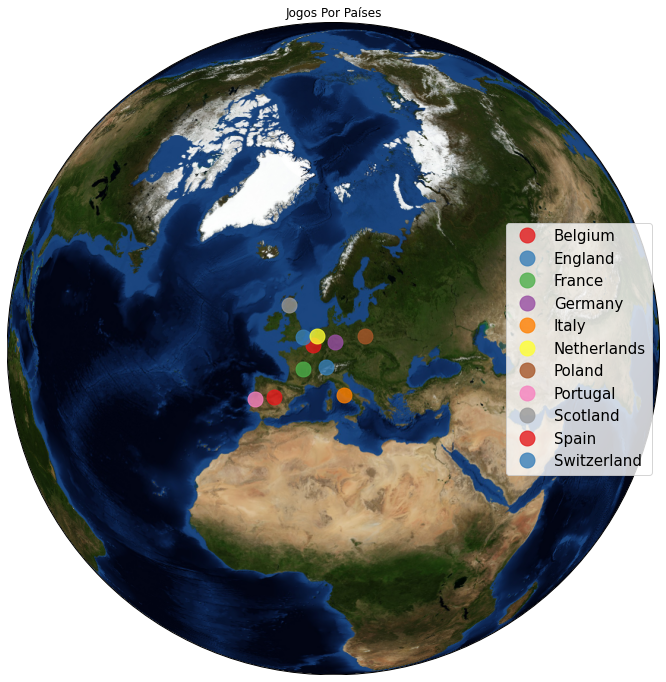

In [134]:
m3 = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=10,urcrnrlat=80,llcrnrlat=-80)

plt.figure(figsize=(12,12))

country = list(country_info["country_x"].unique())
c       = sns.color_palette("Set1",11)
#label   = country

def function(country,c,label):
    lat = list(country_info[country_info["country_x"] == country].latitude) # Ex: country_info[country_info["country_x"] == 'Belgium'].latitude
    lon = list(country_info[country_info["country_x"] == country].longitude)
    x,y = m3(lon,lat)
    m3.plot(x,y,"go",markersize=15,color=c,alpha=.8,label=label)

for i,j in zip(country,c): # zip: agrega elementos baseado nos elementos
    function(i,j,i)

m3.bluemarble(scale=0.5)
plt.legend(loc="center right",frameon=True,prop={"size":15}).get_frame().set_facecolor("white")
plt.title("Jogos Por Países")
plt.show()

In [96]:
list(country_info[country_info["country_x"] == 'Belgium'].latitude)

[50.503887]

In [97]:
list(country_info["country_x"].unique())

['Belgium',
 'England',
 'France',
 'Germany',
 'Italy',
 'Netherlands',
 'Poland',
 'Portugal',
 'Scotland',
 'Spain',
 'Switzerland']

In [98]:
sns.color_palette("Set1",11)

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804)]

In [122]:
m4(lon,lat)

([5980502.244596858], [6441473.140873457])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


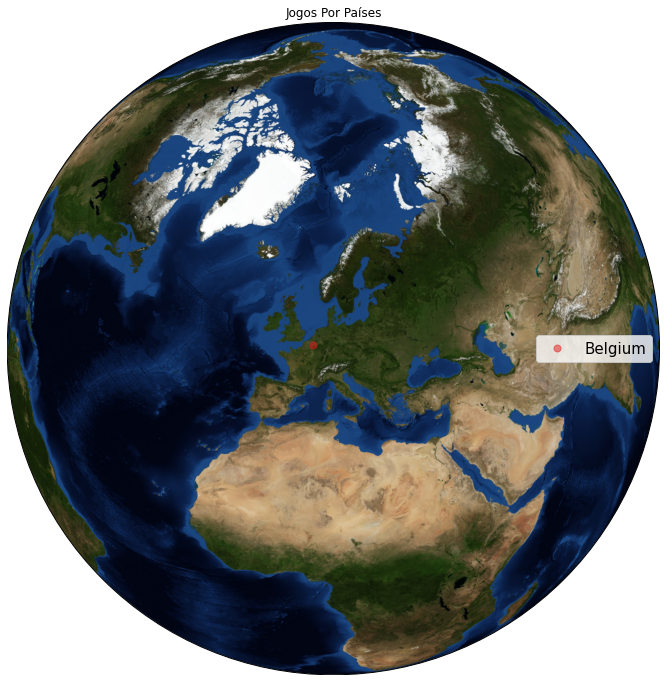

In [124]:
m4 = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=10,urcrnrlat=80,llcrnrlat=-80)
plt.figure(figsize=(12,12))

belgica = 'Belgium'
color = (0.8941176470588236, 0.10196078431372549, 0.10980392156862745)
label = belgica

lat = list(country_info[country_info["country_x"] == belgica].latitude)
lon = list(country_info[country_info["country_x"] == belgica].longitude)

x,y = m4(lon,lat)

m4.plot(x,y,"go",markersize=7,color=color,alpha=.5,label=belgica)

m4.bluemarble(scale=0.9)
plt.legend(loc="center right",frameon=True,prop={"size":15}).get_frame().set_facecolor("white")
plt.title("Jogos Por Países")
plt.show()


In [28]:
country_info

,country_x,league,_merge,latitude,longitude
0,Belgium,Belgium Jupiler League,both,50.503887,4.469936
1,England,England Premier League,both,51.752000,1.257700
2,France,France Ligue 1,both,46.227638,2.213749
3,Germany,Germany 1. Bundesliga,both,51.165691,10.451526
4,Italy,Italy Serie A,both,41.871940,12.567380
5,Netherlands,Netherlands Eredivisie,both,52.132633,5.291266
6,Poland,Poland Ekstraklasa,both,51.919438,19.145136
7,Portugal,Portugal Liga ZON Sagres,both,39.399872,-8.224454
8,Scotland,Scotland Premier League,both,56.901778,-4.490389
9,Spain,Spain LIGA BBVA,both,40.463667,-3.749220


In [46]:
import random

In [54]:
pop = []
for i in range(0,11):
    r = random.randint(3, 29)
    pop.append(r)

In [56]:
pop

[24, 10, 19, 3, 13, 14, 28, 11, 25, 8, 19]

In [59]:
for i,j,p in zip(leag,c,pop):
    print(i,j,p)

Belgium Jupiler League (0.8941176470588236, 0.10196078431372549, 0.10980392156862745) 24
England Premier League (0.21568627450980393, 0.49411764705882355, 0.7215686274509804) 10
France Ligue 1 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726) 19
Germany 1. Bundesliga (0.596078431372549, 0.3058823529411765, 0.6392156862745098) 3
Italy Serie A (1.0, 0.4980392156862745, 0.0) 13
Netherlands Eredivisie (1.0, 1.0, 0.2) 14
Poland Ekstraklasa (0.6509803921568628, 0.33725490196078434, 0.1568627450980392) 28
Portugal Liga ZON Sagres (0.9686274509803922, 0.5058823529411764, 0.7490196078431373) 11
Scotland Premier League (0.6, 0.6, 0.6) 25
Spain LIGA BBVA (0.8941176470588236, 0.10196078431372549, 0.10980392156862745) 8
Switzerland Super League (0.21568627450980393, 0.49411764705882355, 0.7215686274509804) 19


In [79]:
leag = list(country_info["league"].unique())
c    = sns.color_palette("Set1",11)
lat = list(country_info[country_info["league"] == leag].latitude)
lon = list(country_info[country_info["league"] == leag].longitude)

In [80]:
lat

[50.503887,
 51.752,
 46.227638,
 51.165691,
 41.87194,
 52.132633,
 51.919438,
 39.399872,
 56.901778,
 40.463667,
 46.818188]

In [81]:
lon

[4.469936,
 1.2577,
 2.213749,
 10.451526,
 12.56738,
 5.291266,
 19.145136,
 -8.224454,
 -4.490389,
 -3.74922,
 8.227512]

In [82]:
x,y  = m(lon,lat) 

In [83]:
x

[1720927.1893885552,
 1385283.8528793706,
 1485180.4595503216,
 2345937.5638535614,
 2567021.0384570165,
 1806747.1420866412,
 3254324.2037858744,
 394503.03669590474,
 784671.7650652302,
 862115.774807097,
 2113552.5587035236]

In [89]:
import warnings
warnings.filterwarnings("ignore")

### Ligas nos diferentes países

In [27]:
import itertools

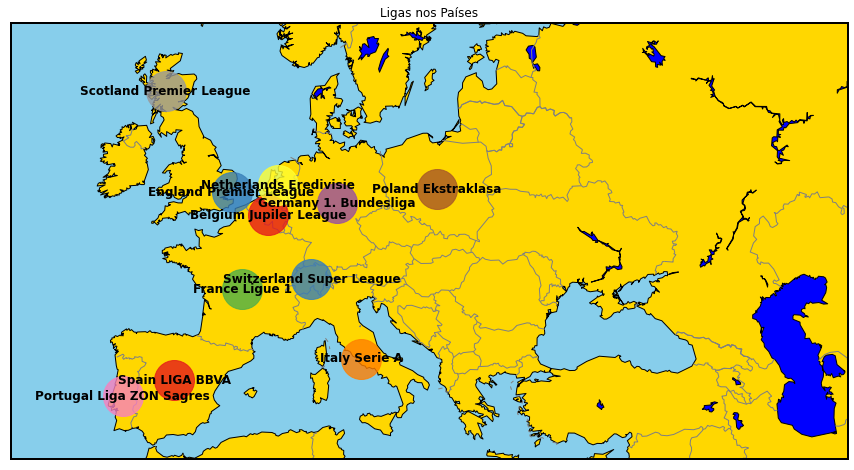

In [93]:
m = Basemap(projection="merc", resolution='l' ,llcrnrlat=35,urcrnrlat=60,llcrnrlon=-18,urcrnrlon=55,lat_ts=20,lat_0=True,lon_0=True)

plt.figure(figsize=(15,10))


m.drawmapboundary(fill_color="skyblue",color="k",linewidth=2)
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1,color="grey")
m.fillcontinents(color="gold",alpha=1,lake_color="b")


leag = list(country_info["league"].unique())
c    = sns.color_palette("Set1",11)
lat = list(country_info[country_info["league"] == leag].latitude)
lon = list(country_info[country_info["league"] == leag].longitude)
x,y  = m(lon,lat) 



def function(leag,c):
    lat = list(country_info[country_info["league"] == leag].latitude)
    lon = list(country_info[country_info["league"] == leag].longitude)
    x,y = m(lon,lat)
    m.plot(x,y,"go",markersize=40,color=j,alpha=.8,linewidth=20) # erro aqui 'j' por 'c'

    
    
pop = [24, 10, 19, 3, 13, 14, 28, 11, 25, 8, 19]
    
def function_david(leag,c,p):
    lat = list(country_info[country_info["league"] == leag].latitude)
    lon = list(country_info[country_info["league"] == leag].longitude)
    x,y = m(lon,lat)
    m.plot(x,y,"go",markersize=p,color=j,alpha=.8,linewidth=20) # erro aqui 'j' por 'c'
        

for i,j in zip(leag,c):
    function(i,j)
    
#for i,j,k in zip(leag,c,pop):
#    function_david(i,j,k)
        
#for i,j,k in itertools.zip_longest(x,y,country_info["league"]):
#    plt.text(i,j,k,fontsize =10,color="k",horizontalalignment='center',verticalalignment='center',weight="bold")

    
for i,j,k in zip(x,y,country_info["league"]):
    plt.text(i,j,k,fontsize =12,color="k",horizontalalignment='center',verticalalignment='center',weight="bold")
    
plt.title("Ligas nos Países")
plt.show()

In [30]:
leag = list(country_info["league"].unique())
leag

['Belgium Jupiler League',
 'England Premier League',
 'France Ligue 1',
 'Germany 1. Bundesliga',
 'Italy Serie A',
 'Netherlands Eredivisie',
 'Poland Ekstraklasa',
 'Portugal Liga ZON Sagres',
 'Scotland Premier League',
 'Spain LIGA BBVA',
 'Switzerland Super League']

In [32]:
lat = list(country_info[country_info["league"] == leag].latitude)
lon = list(country_info[country_info["league"] == leag].longitude)

In [33]:
lat

[50.503887,
 51.752,
 46.227638,
 51.165691,
 41.87194,
 52.132633,
 51.919438,
 39.399872,
 56.901778,
 40.463667,
 46.818188]

In [35]:
lon

[4.469936,
 1.2577,
 2.213749,
 10.451526,
 12.56738,
 5.291266,
 19.145136,
 -8.224454,
 -4.490389,
 -3.74922,
 8.227512]

In [38]:
x,y  = m(lon,lat) 

In [39]:
x

[1720927.1893885552,
 1385283.8528793706,
 1485180.4595503216,
 2345937.5638535614,
 2567021.0384570165,
 1806747.1420866412,
 3254324.2037858744,
 394503.03669590474,
 784671.7650652302,
 862115.774807097,
 2113552.5587035236]

In [40]:
y

[2224691.7233721954,
 2432512.0601150165,
 1551594.233003114,
 2334187.1484706583,
 917929.3822660097,
 2497029.8371496466,
 2460825.599811355,
 577481.4067656104,
 3356755.7767963433,
 722444.0514460136,
 1641276.0388831315]

In [124]:
for j in data["league"].value_counts().values:
    print(j)

3040
3040
3040
3017
2448
2448
2052
1920
1824
1728
1422


In [126]:
for g,j in enumerate([3,45,32,76,79,23,678]):
    print(g,j)

0 3
1 45
2 32
3 76
4 79
5 23
6 678


In [108]:
vc

France Ligue 1              3040
England Premier League      3040
Spain LIGA BBVA             3040
Italy Serie A               3017
Netherlands Eredivisie      2448
Germany 1. Bundesliga       2448
Portugal Liga ZON Sagres    2052
Poland Ekstraklasa          1920
Scotland Premier League     1824
Belgium Jupiler League      1728
Switzerland Super League    1422
Name: league, dtype: int64

In [85]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [86]:
import seaborn as sns

In [81]:
def make_cartopy(projection=ccrs.Robinson(), figsize=(6, 4), resolution='110m'):
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection=projection))
    ax.set_global()
    ax.coastlines(resolution=resolution, color='k')
    # Only PlateCarree and Mercator plots are currently supported.
    gl = ax.gridlines(draw_labels=False)
    ax.add_feature(cfeature.LAND, facecolor='0.75')
    return fig, ax

NameError: name 'lon' is not defined

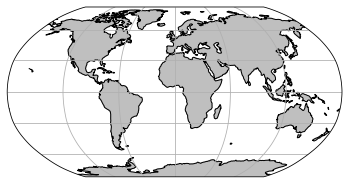

In [84]:
fig, ax = make_cartopy(projection=ccrs.Robinson(), resolution='110m')
_ = ax.plot(lon, lat, transform=ccrs.Geodetic(), **kw)

In [ ]:
m3 = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=10,urcrnrlat=80,llcrnrlat=-80)

plt.figure(figsize=(12,12))

country = list(country_info["country_x"].unique())
c       = sns.color_palette("Set1",11)
#label   = country

def function(country,c,label):
    lat = list(country_info[country_info["country_x"] == country].latitude) # Ex: country_info[country_info["country_x"] == 'Belgium'].latitude
    lon = list(country_info[country_info["country_x"] == country].longitude)
    x,y = m3(lon,lat)
    m3.plot(x,y,"go",markersize=15,color=c,alpha=.8,label=label)

for i,j in zip(country,c): # zip: agrega elementos baseado nos elementos
    function(i,j,i)

m3.bluemarble(scale=0.5)
plt.legend(loc="center right",frameon=True,prop={"size":15}).get_frame().set_facecolor("white")
plt.title("Jogos Por Países")
plt.show()

In [155]:
def m1(projection=ccrs.Orthographic(0, 90), figsize=(12, 8), resolution='110m'):
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection=projection))
    ax.set_global()
    ax.coastlines(resolution=resolution, color='k')
    # Only PlateCarree and Mercator plots are currently supported.
    gl = ax.gridlines(draw_labels=False)
    ax.add_feature(cfeature.LAND, facecolor='0.75')
    return fig, ax

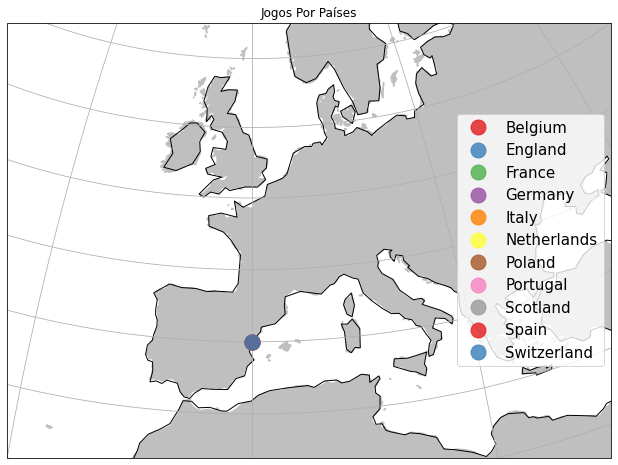

In [183]:
fig, ax = m1(projection=ccrs.Orthographic(0, 40), resolution='110m')
ax.set_extent((-20,30,30,60), crs = ccrs.PlateCarree())
#ax.set_extent([130, 170, -30, -10], ccrs.Orthographic())

country = list(country_info["country_x"].unique())
c       = sns.color_palette("Set1",11)

def function(country,c,label):
    lat = list(country_info[country_info["country_x"] == country].latitude) # Ex: country_info[country_info["country_x"] == 'Belgium'].latitude
    lon = list(country_info[country_info["country_x"] == country].longitude)
    ax.plot(lat,lon,"go",markersize=15,color=c,alpha=.8,label=label)

for i,j in zip(country,c): # zip: agrega elementos baseado nos elementos
    function(i,j,i)

plt.legend(loc="center right",frameon=True,prop={"size":15}).get_frame().set_facecolor("white")
plt.title("Jogos Por Países")
plt.show()

### Jogos por liga

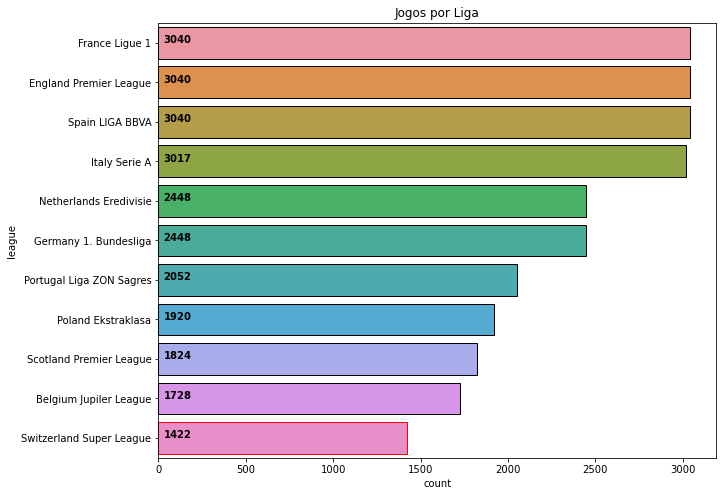

In [136]:
plt.figure(figsize=(10,8))
ax = sns.countplot(y = data["league"], # Mostrar a quantidade de observações em cada categoria utilizando barras
                   order=data["league"].value_counts().index, #data["league"].value_counts(sort=True).sort_values(ascending=True).index,
                   linewidth = 1,
                   edgecolor = ['k','k','k','k','k','k','k','k','k','k','r']#"k"*data["league"].nunique() # ['k','k','k','k','k','k','k','k','k','k','k']
                 )

#ax.text(62,1,3333,weight = "bold")

for i,j in enumerate(data["league"].value_counts().values):
    ax.text(30,i,j,weight = "bold")

plt.title("Jogos por Liga")
plt.show()

In [42]:
data["league"]

0          Belgium Jupiler League
1          Belgium Jupiler League
2          Belgium Jupiler League
3          Belgium Jupiler League
4          Belgium Jupiler League
                   ...           
25974    Switzerland Super League
25975    Switzerland Super League
25976    Switzerland Super League
25977    Switzerland Super League
25978    Switzerland Super League
Name: league, Length: 25979, dtype: object

In [43]:
order=data["league"].value_counts().index
order

Index(['France Ligue 1', 'England Premier League', 'Spain LIGA BBVA',
       'Italy Serie A', 'Germany 1. Bundesliga', 'Netherlands Eredivisie',
       'Portugal Liga ZON Sagres', 'Poland Ekstraklasa',
       'Scotland Premier League', 'Belgium Jupiler League',
       'Switzerland Super League'],
      dtype='object')

In [44]:
"k"*data["league"].nunique()

'kkkkkkkkkkk'

In [137]:
data.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,_merge
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,both
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,both
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium,Belgium Jupiler League,both
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium,Belgium Jupiler League,both
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium,Belgium Jupiler League,both


In [141]:
data.groupby("league").agg({"home_team_goal":"mean","away_team_goal":"mean"})

,home_team_goal,away_team_goal
league,,
Belgium Jupiler League,1.609375,1.192130
England Premier League,1.550987,1.159539
France Ligue 1,1.402961,1.040132
Germany 1. Bundesliga,1.626634,1.274918
Italy Serie A,1.500829,1.116009
Netherlands Eredivisie,1.779820,1.301062
Poland Ekstraklasa,1.394792,1.030208
Portugal Liga ZON Sagres,1.408382,1.126218
Scotland Premier League,1.429276,1.204496


In [143]:
data['season'].value_counts()

2015/2016    3326
2008/2009    3326
2014/2015    3325
2012/2013    3260
2010/2011    3260
2009/2010    3230
2011/2012    3220
2013/2014    3032
Name: season, dtype: int64

In [151]:
pd.set_option('display.max_rows', 500)

In [152]:
data.groupby(["season","league"]).agg({"home_team_goal":"sum","away_team_goal":"sum"})

home_team_goal  away_team_goal
season    league                                                  
2008/2009 Belgium Jupiler League               499             356
          England Premier League               532             410
          France Ligue 1                       489             369
          Germany 1. Bundesliga                520             374
          Italy Serie A                        578             410
          Netherlands Eredivisie               524             346
          Poland Ekstraklasa                   321             203
          Portugal Liga ZON Sagres             296             256
          Scotland Premier League              301             247
          Spain LIGA BBVA                      631             470
          Switzerland Super League             316             224
2009/2010 Belgium Jupiler League               308             257
          England Premier League               645             408
          France Ligue 1                       528             388
          Germany 1. Bundesliga                463             403
          Italy Serie A                        586             406
          Netherlands Eredivisie               528             364
          Poland Ekstraklasa                   299             233
          Portugal Liga ZON Sagres             333             268
          Scotland Premier League              321             264
          Spain LIGA BBVA                      608             423
          Switzerland Super League             359             240
2010/2011 Belgium Jupiler League               382             253
          England Premier League               617             446
          France Ligue 1                       510             380
          Germany 1. Bundesliga                504             390
          Italy Serie A                        544             411
          Netherlands Eredivisie               595             392
          Poland Ekstraklasa                   361             217
          Portugal Liga ZON Sagres             315             269
          Scotland Premier League              315             269
          Spain LIGA BBVA                      622             420
          Switzerland Super League             283             254
2011/2012 Belgium Jupiler League               421             270
          England Premier League               604             462
          France Ligue 1                       560             396
          Germany 1. Bundesliga                508             367
          Italy Serie A                        541             384
          Netherlands Eredivisie               585             412
          Poland Ekstraklasa                   298             229
          Portugal Liga ZON Sagres             359             275
          Scotland Premier League              315             286
          Spain LIGA BBVA                      638             412
          Switzerland Super League             235             190
2012/2013 Belgium Jupiler League               375             328
          England Premier League               592             471
          France Ligue 1                       558             409
          Germany 1. Bundesliga                487             411
          Italy Serie A                        568             435
          Netherlands Eredivisie               540             424
          Poland Ekstraklasa                   322             276
          Portugal Liga ZON Sagres             361             306
          Scotland Premier League              337             286
          Spain LIGA BBVA                      641             450
          Switzerland Super League             272             190
2013/2014 Belgium Jupiler League                18              12
          England Premier League               598             454
          France Ligue 1                       538             395
          German

### Gols fora e dentro de casa por Liga

A função ``groupby`` agrupa as observações no nível definido

In [47]:
data.groupby("league").agg({"home_team_goal":"sum","away_team_goal":"sum"})

,home_team_goal,away_team_goal
league,,
Belgium Jupiler League,2781,2060
England Premier League,4715,3525
France Ligue 1,4265,3162
Germany 1. Bundesliga,3982,3121
Italy Serie A,4528,3367
Netherlands Eredivisie,4357,3185
Poland Ekstraklasa,2678,1978
Portugal Liga ZON Sagres,2890,2311
Scotland Premier League,2607,2197


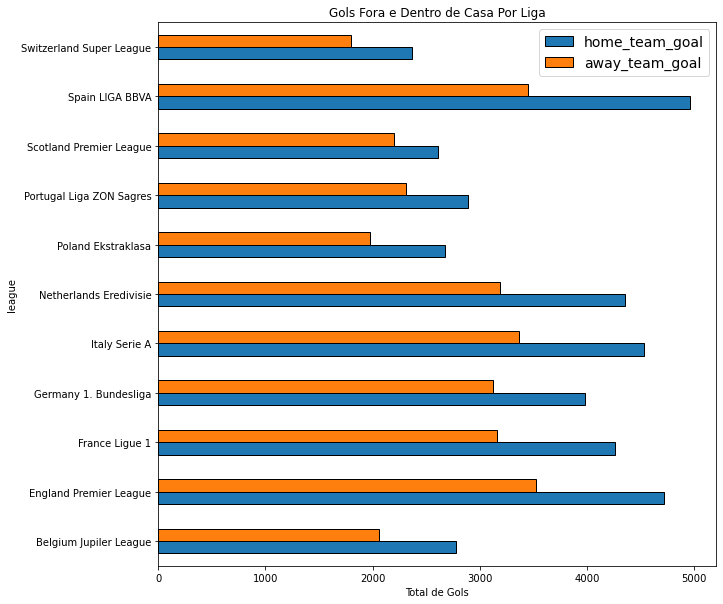

In [144]:
data.groupby("league").agg({"home_team_goal":"sum","away_team_goal":"sum"}).plot(kind="barh",  # Ex: data.groupby("league").agg({"home_team_goal":"sum","away_team_goal":"sum"})
                                                                                 figsize = (10,10),
                                                                                 edgecolor = "k",
                                                                                 linewidth =1
                                                                                )

plt.title("Gols Fora e Dentro de Casa Por Liga")
plt.legend(loc = "best" , prop = {"size" : 14})
plt.xlabel("Total de Gols")
plt.show()

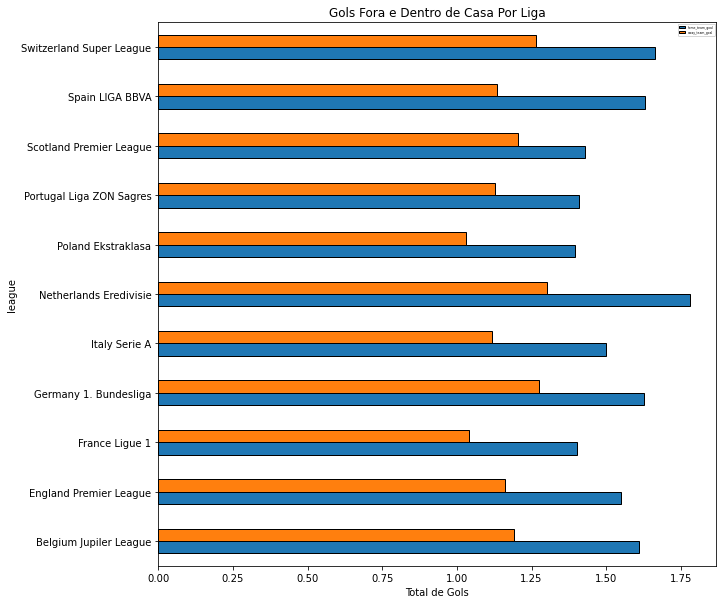

In [148]:
data.groupby("league").agg({"home_team_goal":"mean","away_team_goal":"mean"}).plot(kind="barh",  # Ex: data.groupby("league").agg({"home_team_goal":"sum","away_team_goal":"sum"})
                                                                                 figsize = (10,10),
                                                                                 edgecolor = "k",
                                                                                 linewidth =1
                                                                                )

plt.title("Gols Fora e Dentro de Casa Por Liga")
plt.legend(loc = "best" , prop = {"size" : 3})
plt.xlabel("Total de Gols")
plt.show()

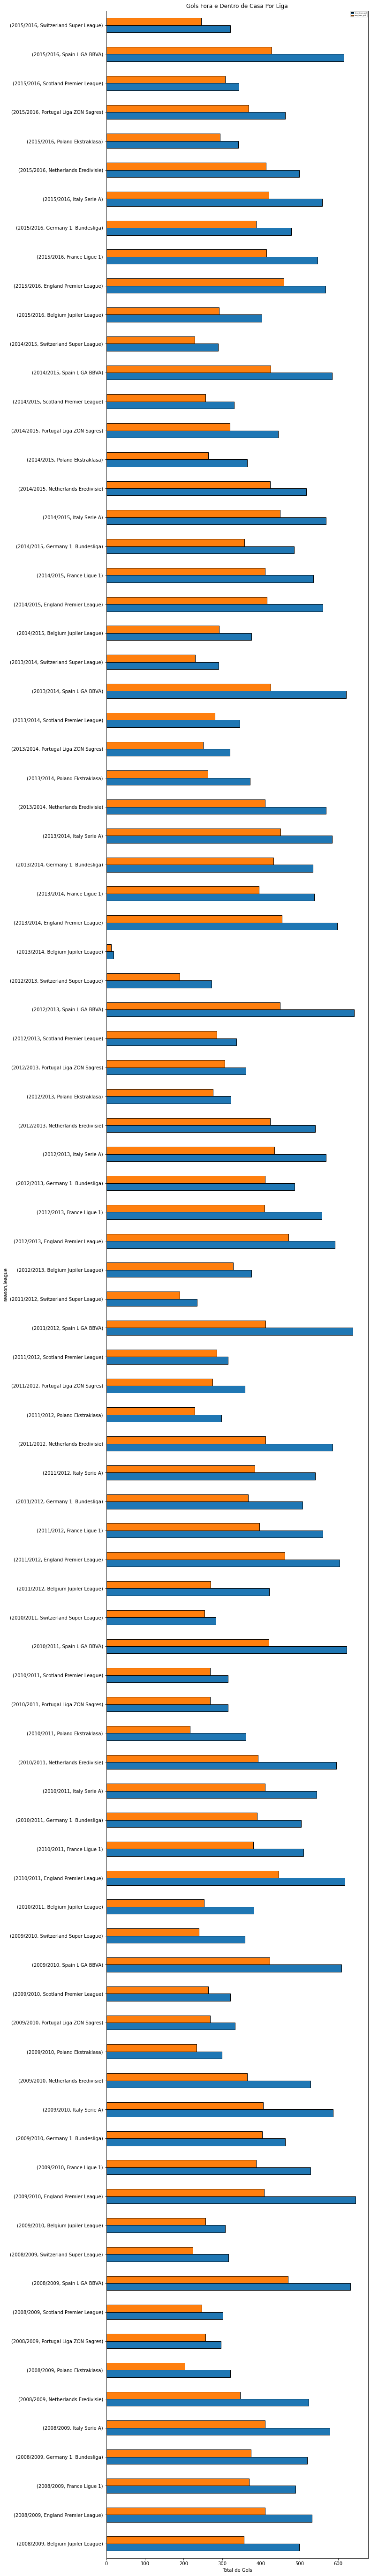

In [154]:
data.groupby(["season","league"]).agg({"home_team_goal":"sum","away_team_goal":"sum"}).plot(kind="barh",  # Ex: data.groupby("league").agg({"home_team_goal":"sum","away_team_goal":"sum"})
                                                                                 figsize = (10,100),
                                                                                 edgecolor = "k",
                                                                                 linewidth =1
                                                                                )

plt.title("Gols Fora e Dentro de Casa Por Liga")
plt.legend(loc = "best" , prop = {"size" : 3})
plt.xlabel("Total de Gols")
plt.show()

In [155]:
data.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,_merge
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,both
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,both
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium,Belgium Jupiler League,both
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium,Belgium Jupiler League,both
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium,Belgium Jupiler League,both


In [156]:
data['date']

0        2008-08-17 00:00:00
1        2008-08-16 00:00:00
2        2008-08-16 00:00:00
3        2008-08-17 00:00:00
4        2008-08-16 00:00:00
                ...         
25974    2015-09-22 00:00:00
25975    2015-09-23 00:00:00
25976    2015-09-23 00:00:00
25977    2015-09-22 00:00:00
25978    2015-09-23 00:00:00
Name: date, Length: 25979, dtype: object

In [157]:
pd.to_datetime(data["date"],format="%Y-%m-%d")

0       2008-08-17
1       2008-08-16
2       2008-08-16
3       2008-08-17
4       2008-08-16
           ...    
25974   2015-09-22
25975   2015-09-23
25976   2015-09-23
25977   2015-09-22
25978   2015-09-23
Name: date, Length: 25979, dtype: datetime64[ns]

Converter variáveis para formato de data

In [159]:
data["date"] = pd.to_datetime(data["date"],format="%Y-%m-%d")
data["date"].head()

0   2008-08-17
1   2008-08-16
2   2008-08-16
3   2008-08-17
4   2008-08-16
Name: date, dtype: datetime64[ns]

In [171]:
data.set_index("date") # set time series

,country_id,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,_merge
date,,,,,,,,,,,,
2008-08-17,1,1,2008/2009,1,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,both
2008-08-16,1,1,2008/2009,1,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,both
2008-08-16,1,1,2008/2009,1,492475,9984,8635,0,3,Belgium,Belgium Jupiler League,both
2008-08-17,1,1,2008/2009,1,492476,9991,9998,5,0,Belgium,Belgium Jupiler League,both
2008-08-16,1,1,2008/2009,1,492477,7947,9985,1,3,Belgium,Belgium Jupiler League,both
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-22,24558,24558,2015/2016,9,1992091,10190,10191,1,0,Switzerland,Switzerland Super League,both
2015-09-23,24558,24558,2015/2016,9,1992092,9824,10199,1,2,Switzerland,Switzerland Super League,both
2015-09-23,24558,24558,2015/2016,9,1992093,9956,10179,2,0,Switzerland,Switzerland Super League,both


In [173]:
pd.DatetimeIndex(data["date"]).month

Int64Index([ 8,  8,  8,  8,  8,  9,  8,  8,  8, 11,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='date', length=25979)

In [166]:
data.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,_merge
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,both
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,both
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,Belgium,Belgium Jupiler League,both
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,Belgium,Belgium Jupiler League,both
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,Belgium,Belgium Jupiler League,both


E Extrair o ano

In [174]:
data["year"] = pd.DatetimeIndex(data["date"]).year

In [176]:
data.tail()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,_merge,year
25974,24558,24558,2015/2016,9,2015-09-22,1992091,10190,10191,1,0,Switzerland,Switzerland Super League,both,2015
25975,24558,24558,2015/2016,9,2015-09-23,1992092,9824,10199,1,2,Switzerland,Switzerland Super League,both,2015
25976,24558,24558,2015/2016,9,2015-09-23,1992093,9956,10179,2,0,Switzerland,Switzerland Super League,both,2015
25977,24558,24558,2015/2016,9,2015-09-22,1992094,7896,10243,0,0,Switzerland,Switzerland Super League,both,2015
25978,24558,24558,2015/2016,9,2015-09-23,1992095,10192,9931,4,3,Switzerland,Switzerland Super League,both,2015


### Partidas jogadas por cada liga por temporada

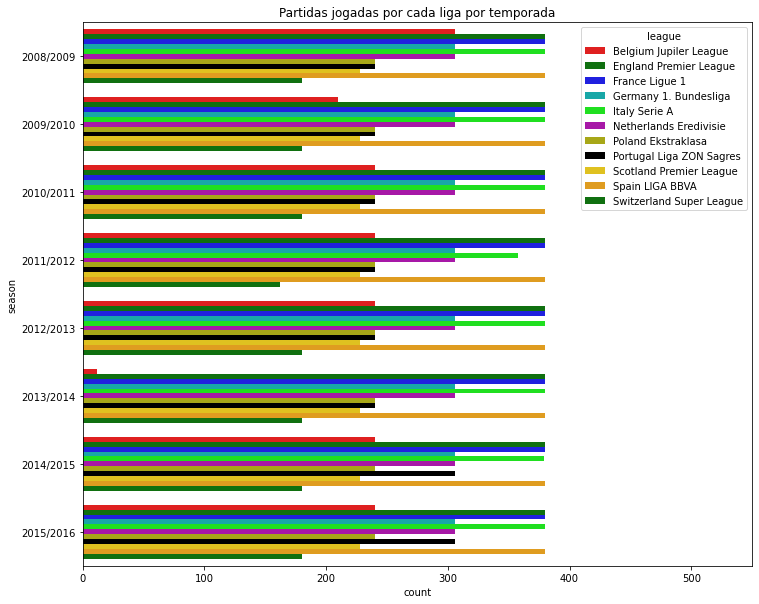

In [181]:
plt.figure(figsize=(12,10))
sns.countplot(y = data["season"],hue=data["league"],
              palette=["r","g","b","c","lime","m","y","k","gold","orange","green"])

plt.xlim([0, 550])
plt.title("Partidas jogadas por cada liga por temporada")
plt.show()

In [182]:
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


### Merge com dados dos times

In [193]:
data = data.merge(teams,left_on="home_team_api_id",right_on="team_api_id",how="left") # use only keys from left frame
data = data.drop(["id","team_api_id",'team_fifa_api_id'],axis = 1)
data = data.rename(columns={ 'team_long_name':"home_team_lname",'team_short_name':"home_team_sname"})
data.columns

Index(['country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'country', 'league', '_merge', 'year',
       'away_team_lname', 'away_team_sname', 'home_team_lname',
       'home_team_sname'],
      dtype='object')

In [186]:
data.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,_merge,year,home_team_lname,home_team_sname,home_team_lname,home_team_sname
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,both,2008,KRC Genk,GEN,KRC Genk,GEN
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,both,2008,SV Zulte-Waregem,ZUL,SV Zulte-Waregem,ZUL
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,Belgium,Belgium Jupiler League,both,2008,KSV Cercle Brugge,CEB,KSV Cercle Brugge,CEB
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,Belgium,Belgium Jupiler League,both,2008,KAA Gent,GEN,KAA Gent,GEN
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,Belgium,Belgium Jupiler League,both,2008,FCV Dender EH,DEN,FCV Dender EH,DEN


In [187]:
data = data.merge(teams,left_on="away_team_api_id",right_on="team_api_id",how="left")
data = data.drop(["id","team_api_id",'team_fifa_api_id'],axis = 1)
data = data.rename(columns={ 'team_long_name':"away_team_lname",'team_short_name':"away_team_sname"})
data.columns

Index(['country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'country', 'league', '_merge', 'year',
       'home_team_lname', 'home_team_sname', 'home_team_lname',
       'home_team_sname', 'away_team_lname', 'away_team_sname'],
      dtype='object')

In [194]:
data.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,_merge,year,away_team_lname,away_team_sname,home_team_lname,home_team_sname
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,both,2008,Beerschot AC,BAC,KRC Genk,GEN
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,both,2008,Sporting Lokeren,LOK,SV Zulte-Waregem,ZUL
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,Belgium,Belgium Jupiler League,both,2008,RSC Anderlecht,AND,KSV Cercle Brugge,CEB
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,Belgium,Belgium Jupiler League,both,2008,RAEC Mons,MON,KAA Gent,GEN
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,Belgium,Belgium Jupiler League,both,2008,Standard de Liège,STL,FCV Dender EH,DEN


In [198]:
data.groupby("home_team_lname")["home_team_goal"].sum().reset_index()

,home_team_lname,home_team_goal
0,1. FC Kaiserslautern,37
1,1. FC Köln,116
2,1. FC Nürnberg,108
3,1. FSV Mainz 05,171
4,AC Ajaccio,64
5,AC Arles-Avignon,14
6,AC Bellinzona,74
7,ADO Den Haag,204
8,AJ Auxerre,98
9,AS Monaco,153


### Top times por gols fora e dentro de casa

In [199]:
h_t = data.groupby("home_team_lname")["home_team_goal"].sum().reset_index()
a_t = data.groupby("away_team_lname")["away_team_goal"].sum().reset_index()

In [200]:
h_t.head()

,home_team_lname,home_team_goal
0,1. FC Kaiserslautern,37
1,1. FC Köln,116
2,1. FC Nürnberg,108
3,1. FSV Mainz 05,171
4,AC Ajaccio,64


In [201]:
h_t = h_t.sort_values(by="home_team_goal",ascending= False)
a_t = a_t.sort_values(by="away_team_goal",ascending= False)

In [203]:
h_t.head()

,home_team_lname,home_team_goal
211,Real Madrid CF,505
75,FC Barcelona,495
49,Celtic,389
77,FC Bayern Munich,382
184,PSV,370


In [204]:
a_t.head()

,away_team_lname,away_team_goal
75,FC Barcelona,354
211,Real Madrid CF,338
49,Celtic,306
15,Ajax,287
184,PSV,282


In [210]:
h_t[:10]

,home_team_lname,home_team_goal
211,Real Madrid CF,505
75,FC Barcelona,495
49,Celtic,389
77,FC Bayern Munich,382
184,PSV,370
161,Manchester City,365
15,Ajax,360
76,FC Basel,344
162,Manchester United,338
51,Chelsea,333


In [211]:
"k"*20

'kkkkkkkkkkkkkkkkkkkk'

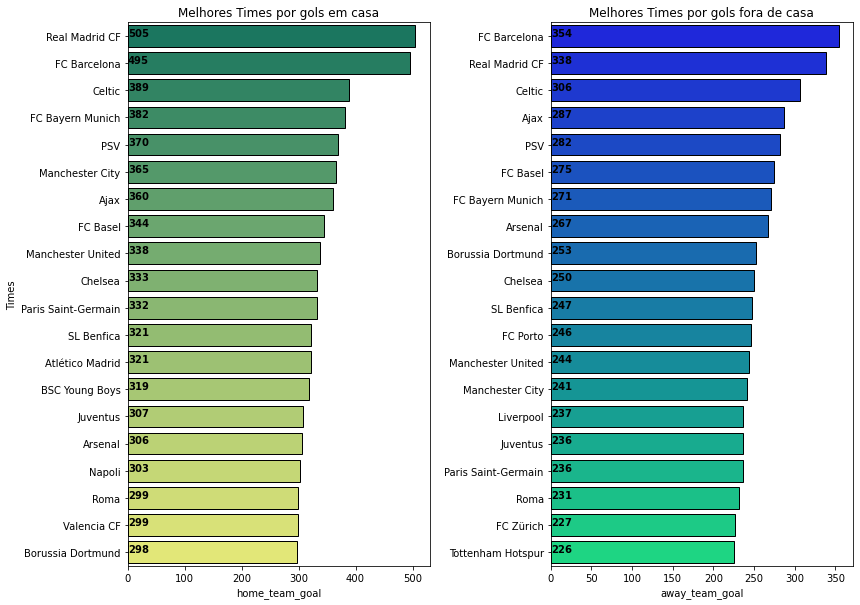

In [212]:
plt.figure(figsize=(13,10))
plt.subplot(121)
ax = sns.barplot(y="home_team_lname",x="home_team_goal",
                 data=h_t[:20],palette="summer",
                 linewidth = 1,edgecolor = "k"*20) # Cores da borda das barras.

plt.ylabel('Times')
plt.title("Melhores Times por gols em casa")

for i,j in enumerate(h_t["home_team_goal"][:20]):
    ax.text(.7,i,j,weight = "bold")

plt.subplot(122)
ax = sns.barplot(y="away_team_lname",x="away_team_goal",
                 data=a_t[:20],palette="winter",
                linewidth = 1,edgecolor = "k"*20)

plt.ylabel("")
plt.subplots_adjust(wspace = .4) # Espaço para separar os gráficos
plt.title("Melhores Times por gols fora de casa")

for i,j in enumerate(a_t["away_team_goal"][:20]):
    ax.text(.7,i,j,weight = "bold")

plt.show()

###  Times com mais gols

In [214]:
x = h_t
x = x.rename(columns={'home_team_lname':"team", 'home_team_goal':"goals"})
y = a_t
y = y.rename(columns={'away_team_lname':"team", 'away_team_goal':"goals"})

In [219]:
len(y)

296

In [221]:
pd.concat([x,y])

,team,goals
211,Real Madrid CF,505
75,FC Barcelona,495
49,Celtic,389
77,FC Bayern Munich,382
184,PSV,370
...,...,...
129,Hércules Club de Fútbol,9
270,Uniao da Madeira,8
5,AC Arles-Avignon,7
216,Reggio Calabria,7


In [223]:
goals = pd.concat([x,y])
goals

,team,goals
211,Real Madrid CF,505
75,FC Barcelona,495
49,Celtic,389
77,FC Bayern Munich,382
184,PSV,370
...,...,...
129,Hércules Club de Fútbol,9
270,Uniao da Madeira,8
5,AC Arles-Avignon,7
216,Reggio Calabria,7


In [224]:
goals = goals.groupby("team")["goals"].sum().reset_index().sort_values(by = "goals",ascending = False)

In [225]:
goals.head()

,team,goals
75,FC Barcelona,849
211,Real Madrid CF,843
49,Celtic,695
77,FC Bayern Munich,653
184,PSV,652


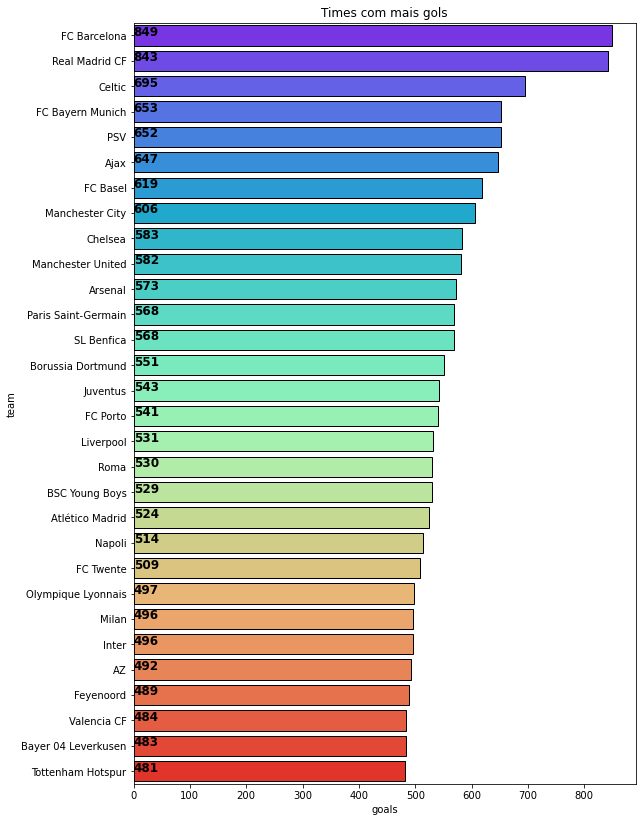

In [228]:
plt.figure(figsize=(9,14))
ax = sns.barplot(x="goals",y="team",
                 data=goals[:30],palette="rainbow",
                linewidth = 1,edgecolor = "k"*10)

for i,j in enumerate(goals["goals"][:30]):
    ax.text(.3,i,j,weight="bold",color = "k",fontsize =12)

plt.title("Times com mais gols")
plt.show()